### Content
0. Import libraries
1. Read raw data
2. Extract data to lists
3. Run sequent peak algorithm and explore results with `spa`
4. Plot results from sequent peak algorithm with `spa_plot`
5. Run storage simulation and explore results with `sim`
6. Plot results from storage simulation with `sim_plot`
7. Save simulation results to csv

### 0. Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sequent_peak_algorithm.sequent_peak_algorithm as spa

### 1. Read raw data (first 150 rows)

The data set contains discharge data (1 000 000 m³/Month) from the measuring station "Klingenthal 1 / Zwota (Svatava)" located in the Ore Mountains in Saxony (Germany) from November 1959 until October 1999 as well as scheduled outflow (1 000 000 m³/Month). 

Current discharge information can be found here at the website of the Saxon State Office for Environment, Agriculture and Geology (LfULG): https://www.umwelt.sachsen.de/umwelt/infosysteme/hwims/portal/web/wasserstand-pegel-530020

In [2]:
df = pd.read_csv('example_1_raw_data.csv')
df = df.iloc[:150]
df.head()

,month,Q_in_hm3,Q_out_hm3
0,11/1959,0.871,1.834
1,12/1959,0.664,1.834
2,01/1960,1.817,1.310
3,02/1960,1.457,1.048
4,03/1960,4.831,0.786


### 2. Extract data to lists

The algorithm requires lists of float values and does not work with pandas dataframes. Therefore, the data is extracted from the dataframe and converted to lists.

In [3]:
months = df["month"].tolist()
q_in = df["Q_in_hm3"].tolist()
q_out = df["Q_out_hm3"].tolist()

print("Months: ", months[:5])
print("Q in: ", q_in[:5])
print("Q out: ", q_out[:5])

Months:  ['11/1959', '12/1959', '01/1960', '02/1960', '03/1960']
Q in:  [0.871, 0.664, 1.817, 1.457, 4.831]
Q out:  [1.834, 1.834, 1.31, 1.048, 0.786]


### 3. Run sequent peak algorithm and explore results

The algorithm input parameters are:
- `q_in`: discharge input
- `q_out`: discharge output

The algorithm returns a collections.namedtuple with the following attributes:
- `q_in`: discharge input, input parameter
- `q_out`: discharge output, input parameter
- `storage`: storage, calculated with `_storage`
- `cumulative_storage`: cumulative storage, calculated with `_cumulative_storage`
- `max_vals`: discharge values of the maxima, calculated with `_maxima`
- `max_indices`: indices of the maxima, calculated with `_maxima`
- `min_vals`: discharge values of the minima, calculated with `_minima`
- `min_indices`: indices of the minima, calculated with `_minima`
- `capacity`: capacity, calculated with `_capacity`
- `capacity_indices`: indices of the capacity (multiple positions possible), calculated with `_capacity`
- `capacity_max_vals`: preceding maxima values of the capacity, calculated with `_capacity` 
- `capacity_max_indices`: preceding maxima indices of the capacity, calculated with `_capacity`
- `capacity_min_vals`: succeeding minima values of the capacity, calculated with `_capacity`
- `capacity_min_indices`: succeeding minima indices of the capacity, calculated with `_capacity`

The algorithm is based on the following paper: https://www.icevirtuallibrary.com/doi/10.1680/imotp.1883.21797

In [4]:
res_cap = spa.spa(q_in=q_in, q_out=q_out)

for name, val in res_cap._asdict().items():
    print(name, "\n\t", val)

q_in 
	 [0.871, 0.664, 1.817, 1.457, 4.831, 2.981, 2.973, 1.742, 1.089, 1.278, 0.658, 5.106, 3.009, 3.668, 1.514, 5.101, 6.602, 5.793, 4.235, 5.892, 1.931, 1.812, 1.198, 1.037, 1.06, 1.783, 3.02, 1.61, 2.481, 9.45, 3.72, 1.586, 1.638, 0.853, 0.837, 0.819, 1.032, 1.122, 1.05, 0.804, 3.919, 7.042, 2.252, 2.452, 1.879, 0.824, 0.596, 0.695, 0.723, 0.695, 0.658, 0.648, 2.952, 4.681, 2.551, 0.975, 0.653, 0.417, 0.482, 0.767, 1.348, 1.49, 1.278, 0.837, 5.524, 13.237, 9.318, 4.44, 1.433, 1.135, 1.571, 1.089, 1.112, 7.185, 3.535, 7.374, 4.08, 5.581, 3.294, 4.264, 6.073, 1.312, 2.063, 1.822, 2.509, 4.469, 4.321, 8.04, 6.773, 5.684, 1.26, 1.169, 1.122, 1.433, 1.179, 1.273, 1.405, 5.684, 7.382, 2.693, 9.29, 10.337, 3.815, 1.68, 1.851, 2.159, 3.502, 7.919, 1.926, 1.731, 1.61, 1.586, 4.585, 14.331, 7.644, 2.589, 1.96, 2.115, 2.864, 1.983, 1.122, 0.918, 0.614, 1.288, 3.468, 13.237, 10.275, 3.961, 1.576, 4.018, 1.34, 3.066, 7.431, 4.699, 2.063, 2.74, 4.368, 6.877, 3.082, 5.093, 2.068, 1.07, 0.876, 0.7

### 4. Plot results from sequent peak algorithm

The red dots in subplot E. represents the maxima, the green dots the minima.

The function `spa_plot` plots the results from `spa` and returns an matplotlib.figure.Figure object. It can be saved with `plt.savefig()` or edited with matplotlib functions.

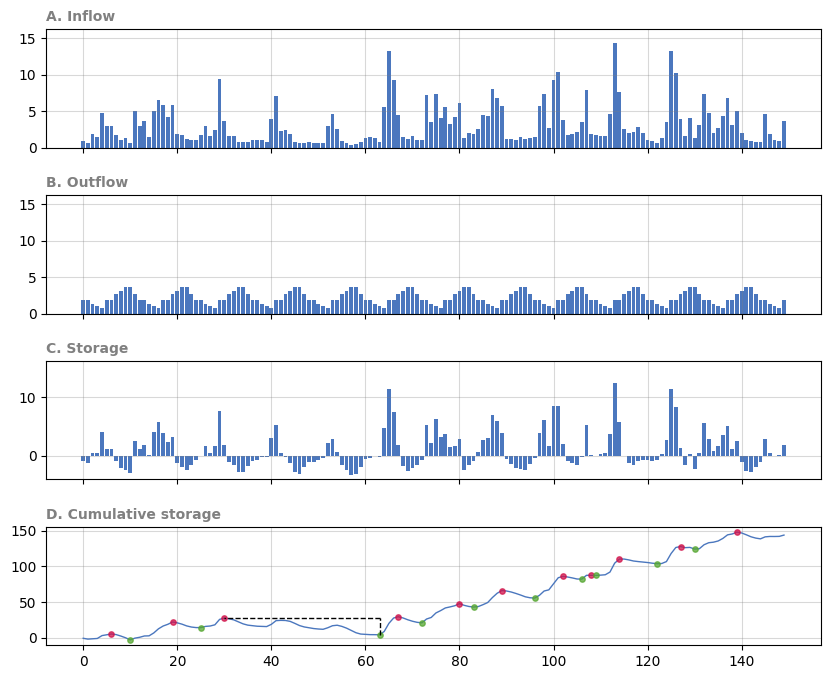

In [5]:
fig_cap = spa.spa_plot(res_cap)
plt.savefig("example_1_spa.png", dpi=300)

### 5. Run storage simulation and explore results

The algorithm input parameters are:
- `q_in`: discharge input
- `q_out`: discharge output
- `initial_storage`: initial storage of the reservoir (chosen by the user)
- `capacity`: capacity of the reservoir (can be calculated with `spa` or chosen by the user)

The algorithm returns a collections.namedtuple with the following attributes:
- `q_in`: discharge input, input parameter
- `q_out`: discharge output, input parameter
- `capacity`: capacity, input parameter
- `inital_storage`: initial storage, input parameter
- `q_out_real`: monthly real discharge output accounting for the capacity (deficit and overflow situation)
- `storage`: monthly storage volume
- `deficit`: monthly deficit volume
- `overflow`: monthly overflow volume

In [6]:
res_sim = spa.sim(
    q_in=q_in,
    q_out=q_out,
    initial_storage=0.0,
    capacity=res_cap.capacity
)

for name, val in res_sim._asdict().items():
    print(name, "\n\t", val)

q_in 
	 [0.871, 0.664, 1.817, 1.457, 4.831, 2.981, 2.973, 1.742, 1.089, 1.278, 0.658, 5.106, 3.009, 3.668, 1.514, 5.101, 6.602, 5.793, 4.235, 5.892, 1.931, 1.812, 1.198, 1.037, 1.06, 1.783, 3.02, 1.61, 2.481, 9.45, 3.72, 1.586, 1.638, 0.853, 0.837, 0.819, 1.032, 1.122, 1.05, 0.804, 3.919, 7.042, 2.252, 2.452, 1.879, 0.824, 0.596, 0.695, 0.723, 0.695, 0.658, 0.648, 2.952, 4.681, 2.551, 0.975, 0.653, 0.417, 0.482, 0.767, 1.348, 1.49, 1.278, 0.837, 5.524, 13.237, 9.318, 4.44, 1.433, 1.135, 1.571, 1.089, 1.112, 7.185, 3.535, 7.374, 4.08, 5.581, 3.294, 4.264, 6.073, 1.312, 2.063, 1.822, 2.509, 4.469, 4.321, 8.04, 6.773, 5.684, 1.26, 1.169, 1.122, 1.433, 1.179, 1.273, 1.405, 5.684, 7.382, 2.693, 9.29, 10.337, 3.815, 1.68, 1.851, 2.159, 3.502, 7.919, 1.926, 1.731, 1.61, 1.586, 4.585, 14.331, 7.644, 2.589, 1.96, 2.115, 2.864, 1.983, 1.122, 0.918, 0.614, 1.288, 3.468, 13.237, 10.275, 3.961, 1.576, 4.018, 1.34, 3.066, 7.431, 4.699, 2.063, 2.74, 4.368, 6.877, 3.082, 5.093, 2.068, 1.07, 0.876, 0.7

### 6. Plot results from storage simulation

The function `sim_plot` plots the results from `sim` and returns an matplotlib.figure.Figure object. It can be saved with `plt.savefig()` or edited with matplotlib functions.

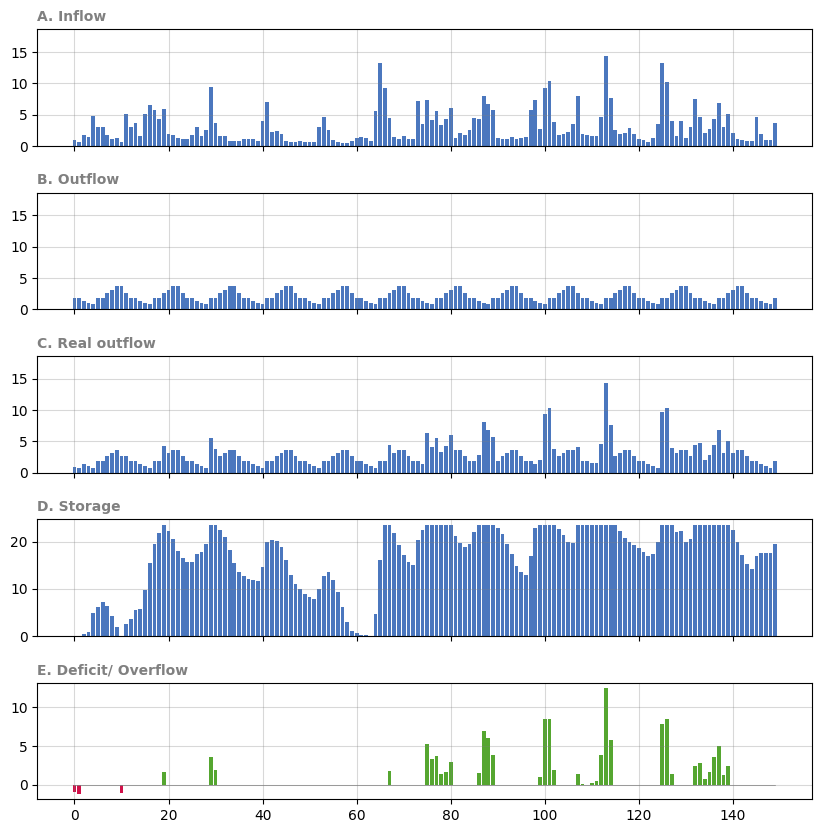

In [7]:
fig_sim = spa.sim_plot(res_sim)
plt.savefig("example_1_sim.png", dpi=300)

### 7. Save simulation results to csv

Optionally, the simulation results can be saved to a csv file for further processing.

In [8]:
df_res = pd.DataFrame()

# Input data
df_res["month"] = df["month"]
df_res["q_in"] = df["Q_in_hm3"]
df_res["q_out"] = df["Q_out_hm3"]

# Data from storage simulation
df_res["q_out_real"] = res_sim.q_out_real
df_res["storage"] = res_sim.storage
df_res["deficit"] = res_sim.deficit
df_res["overflow"] = res_sim.overflow

df_res.to_csv("example_1_results.csv", index=False)

df_res.head()

,month,q_in,q_out,q_out_real,storage,deficit,overflow
0,11/1959,0.871,1.834,0.871,0.000,-0.963,0.0
1,12/1959,0.664,1.834,0.664,0.000,-1.170,0.0
2,01/1960,1.817,1.310,1.310,0.507,0.000,0.0
3,02/1960,1.457,1.048,1.048,0.916,0.000,0.0
4,03/1960,4.831,0.786,0.786,4.961,0.000,0.0
